In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# 1. Load dataset
df = pd.read_csv('digit_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 2. Convert the data given in the dataFrame into a NumPy array
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
# 3. Query the shape of the array
data_shape = data.shape
data_count = data_shape[0]
features = data_shape[1]

data_count, features

(42000, 785)

In [9]:
# 4. Shuffle the contents of the array 
np.random.shuffle(data)

In [10]:
# 5. Use first 1000 images of the dataset as the test set and remaining as the train set
test = data[:1000]
train = data[1000:]

In [11]:
# For test set -- Transpose the data (Take rows as the labels of the test set and rows as the features)
test = test.T
X_test = test[1:, :]
y_test = test[0,:]
X_test = X_test / 255 # Color normalization


test.shape, X_test.shape, y_test.shape 

((785, 1000), (784, 1000), (1000,))

In [12]:
# For train set -- Transpose the data (Take rows as the labels and rows as the features)
train = train.T
X_train = train[1:, :]
y_train = train[0]

X_train = X_train / 255

train.shape, X_train.shape, y_train.shape 

((785, 41000), (784, 41000), (41000,))

In [13]:
# Generate a random index in the range dedicated for training images
index = np.random.randint(0, len(train),1)
index

array([492])

In [14]:
train.shape

(785, 41000)

In [15]:
train[index].shape

(1, 41000)

In [16]:
train_ = train.T
new_img = train_[index, :-1]
new_img.shape

new_image = new_img.reshape(28,-1)
new_image.shape

(28, 28)

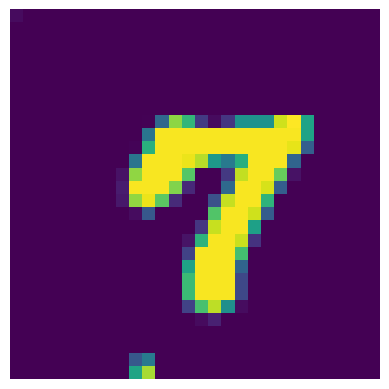

In [17]:
# X_test_2d = new_img.reshape(28,-1)
# X_test_2d.shape
plt.imshow(new_image) 
plt.axis('off')
plt.show()

In [18]:
def initial_params():    
    W1 = np.random.uniform(low=-0.5, high=0.5, size=(10,784))
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(10,10))
    b1 = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
    b2 = np.random.uniform(low=-0.5, high=0.5, size=(10,1))

    # print(W1.shape, W2.shape, b1.shape, b2.shape)
    return W1, b1, W2, b2

_, _, W2, _ = initial_params()
W2[:100]

array([[-0.35341069, -0.20123052,  0.37685608,  0.26422929, -0.37597242,
        -0.35049998,  0.48013297,  0.30907047, -0.4606284 , -0.28955806],
       [ 0.29292698, -0.07751962,  0.13199137,  0.11392826,  0.40881785,
         0.41920339, -0.30599902, -0.35444705, -0.35296438, -0.07891098],
       [ 0.21687959, -0.35888669,  0.27014982, -0.06198179,  0.10331858,
        -0.21047133, -0.39670337, -0.07736683, -0.09768427, -0.35122744],
       [ 0.28149837,  0.01015978,  0.22411337, -0.46000768, -0.32512537,
         0.04931723, -0.33849541,  0.20428502, -0.24352818,  0.17143918],
       [ 0.39717557,  0.08579   , -0.39311437,  0.26092094, -0.49755579,
         0.31425824,  0.37200057,  0.11808701, -0.15833865, -0.29599713],
       [ 0.32980758, -0.426852  , -0.20401402,  0.19266404, -0.26593542,
         0.38000993, -0.22646885,  0.38694855, -0.22949638, -0.0991963 ],
       [ 0.11637864, -0.34168371,  0.4415039 , -0.1458225 ,  0.40046847,
         0.32957789, -0.45435435, -0.17102695

In [19]:
def ReLU_fn(vector):
    return np.maximum(0, vector)

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = ReLU_fn(vector)
vector, relu

(array([[-0.14928437],
        [ 0.06801349],
        [-0.31040219],
        [-0.2701153 ],
        [ 0.49721321],
        [ 0.45524656],
        [ 0.43444367],
        [-0.07023351],
        [-0.47378042],
        [ 0.03109259]]),
 array([[0.        ],
        [0.06801349],
        [0.        ],
        [0.        ],
        [0.49721321],
        [0.45524656],
        [0.43444367],
        [0.        ],
        [0.        ],
        [0.03109259]]))

In [20]:
def d_ReLU(vector):
    return np.where(vector > 0, 1.0, 0.0)


vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = d_ReLU(vector)
relu

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [21]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000])
vector

array([ 0.34057197, -0.11709756, -0.49695817, -0.06184445, -0.45438843,
       -0.42768081,  0.1133097 ,  0.10174686, -0.46840334, -0.44742315,
        0.        ])

(-0.5, 0.5)

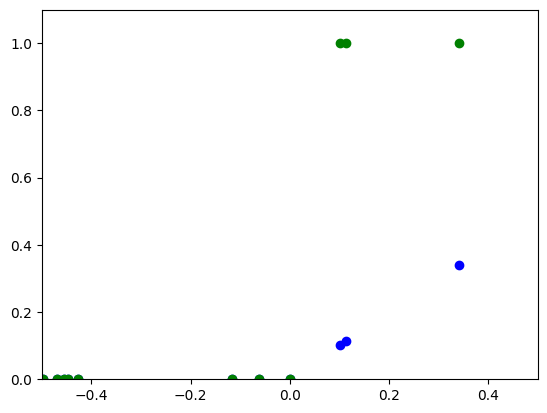

In [22]:
relu = ReLU_fn(vector)
d_relu = d_ReLU(vector)

plt.scatter(vector, relu, c='blue')
plt.scatter(vector, d_relu, c='green')
plt.ylim(0.0, 1.1)
plt.xlim(-0.5, 0.5)

In [23]:
def softmax_fn(vector):
    exp_vector = np.exp(vector - np.max(vector))
    return exp_vector / exp_vector.sum()

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
softmax = softmax_fn(vector)
vector, softmax

(array([[-0.08881039],
        [ 0.17158234],
        [-0.19032182],
        [-0.41296883],
        [ 0.26501136],
        [ 0.41435429],
        [ 0.27751858],
        [-0.09072557],
        [ 0.08074469],
        [-0.07278392]]),
 array([[0.08588155],
        [0.11142612],
        [0.07759148],
        [0.06210401],
        [0.12233838],
        [0.14204356],
        [0.1238781 ],
        [0.08571723],
        [0.10175054],
        [0.08726902]]))

In [24]:
# def df_softmax(vector):
#     d_softmax = softmax_fn(vector) * (1 - softmax_fn(vector))

#     return d_softmax

# vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
# d_softmax = softmax_fn(vector)
# vector, d_softmax

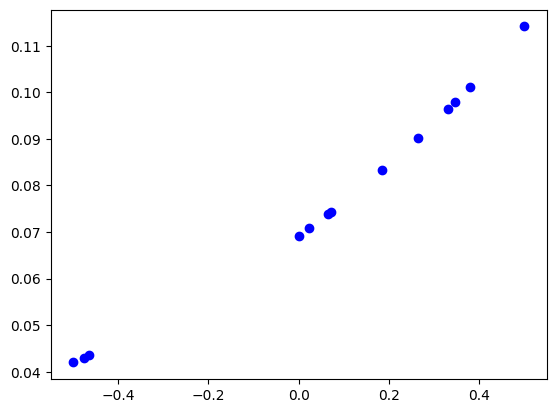

In [25]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000, -0.5, 0.5])
vector

softmax = softmax_fn(vector)
# d_softmax = df_softmax(vector)

plt.scatter(vector, softmax, c='blue')
# plt.scatter(vector, d_softmax, c='green')


In [26]:
def dropout_forward(A, dropout_rate):
    mask = np.random.binomial(1, 1 - dropout_rate, size=A.shape)
    A_dropout = A * mask
    A_dropout /= (1-dropout_rate)
    return A_dropout, mask

In [27]:
def forward_prop(W1, b1, W2, b2, A0, dropout_rate = 0.5):
    Z1 = np.dot(W1, A0) + b1
    A1 = ReLU_fn(Z1)
    A1, _ = dropout_forward(A1, dropout_rate)

    Z2 = np.dot(W2, A1) + b2
    A2 = softmax_fn(Z2)

    return Z1, A1, Z2, A2

In [28]:
# One hot encoding
def one_hot_encoding(Y, num_classes):
    num_classes = int(num_classes)  # Ensure num_classes is an integer
    encoded_mat = np.zeros((num_classes, len(Y)))
    for i in range(len(Y)):
        class_index = int(Y[i])
        encoded_mat[class_index, i] = 1
    return encoded_mat

y_train = one_hot_encoding(y_train, num_classes=10)
y_train.shape
y_test = one_hot_encoding(y_test, num_classes=10)
y_test.shape


(10, 1000)

In [29]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, y, A0, y_train):
    m = A0.shape[1]
    dZ2 = A2 - y_train
    dZ1 = np.dot(W2.T, dZ2) * d_ReLU(Z1)

    dW1 = (1 / m) * np.dot(dZ1, A0.T)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

In [30]:
# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate= 0.01):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

In [31]:
def obtain_predictions(vector):  # Corrected parameter name
    return np.argmax(vector, axis=0)


In [32]:
%pip install scikit-learn
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
def accuracy_sc(y_pred, y_actual): # Vectors  
    num_samples = y_actual.shape[1]

    if y_pred.ndim ==2:
        pred_label = obtain_predictions(y_pred)
    else:
        pred_label = y_pred
        
    if y_actual.ndim == 2:
        actual_label = obtain_predictions(y_actual)
    else:
        actual_label = y_actual
    
    num_correct = np.sum(pred_label == actual_label)
    # print(num_correct)
    return num_correct / num_samples

In [34]:
y_train.shape

(10, 41000)

In [40]:
def gradient_descent(X_train, y_train, learning_rate, num_iterations, dropout_rate):
    W1, b1, W2, b2 = initial_params()

    accuracy_list = []

    for i in range(num_iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train, dropout_rate)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, y_train, X_train, y_train)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i%5==0:
            accuracy = accuracy_sc(A2,y_train)
            accuracy_list.append((i,accuracy))
            print(f"Iteration: {i} \t Accuracy: {accuracy:.5f}")

    return W1, b1, W2, b2, accuracy_list

In [36]:
def make_prediction(X_test, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test) 
    pred = obtain_predictions(A2)
    return pred    

In [37]:
def plot_image(image):
    X_test_2d = image.reshape(28,-1)
    print(X_test_2d.shape)
    plt.imshow(X_test_2d) 
    plt.axis('off')
    plt.show()

In [45]:
W1, b1, W2, b2, accuracy_list = gradient_descent(X_train, y_train, learning_rate=0.0001, num_iterations=1000, dropout_rate=0.8)

Iteration: 0 	 Accuracy: 0.10202
Iteration: 5 	 Accuracy: 0.10161
Iteration: 10 	 Accuracy: 0.10059
Iteration: 15 	 Accuracy: 0.10168
Iteration: 20 	 Accuracy: 0.10361
Iteration: 25 	 Accuracy: 0.10293
Iteration: 30 	 Accuracy: 0.10078
Iteration: 35 	 Accuracy: 0.10205
Iteration: 40 	 Accuracy: 0.10095
Iteration: 45 	 Accuracy: 0.10298
Iteration: 50 	 Accuracy: 0.10261
Iteration: 55 	 Accuracy: 0.10273
Iteration: 60 	 Accuracy: 0.10227
Iteration: 65 	 Accuracy: 0.10115
Iteration: 70 	 Accuracy: 0.10285
Iteration: 75 	 Accuracy: 0.10171
Iteration: 80 	 Accuracy: 0.10320
Iteration: 85 	 Accuracy: 0.10207
Iteration: 90 	 Accuracy: 0.10195
Iteration: 95 	 Accuracy: 0.10427
Iteration: 100 	 Accuracy: 0.10156
Iteration: 105 	 Accuracy: 0.10102
Iteration: 110 	 Accuracy: 0.10117
Iteration: 115 	 Accuracy: 0.10307
Iteration: 120 	 Accuracy: 0.10222
Iteration: 125 	 Accuracy: 0.10398
Iteration: 130 	 Accuracy: 0.10278
Iteration: 135 	 Accuracy: 0.10276
Iteration: 140 	 Accuracy: 0.10141
Iterati

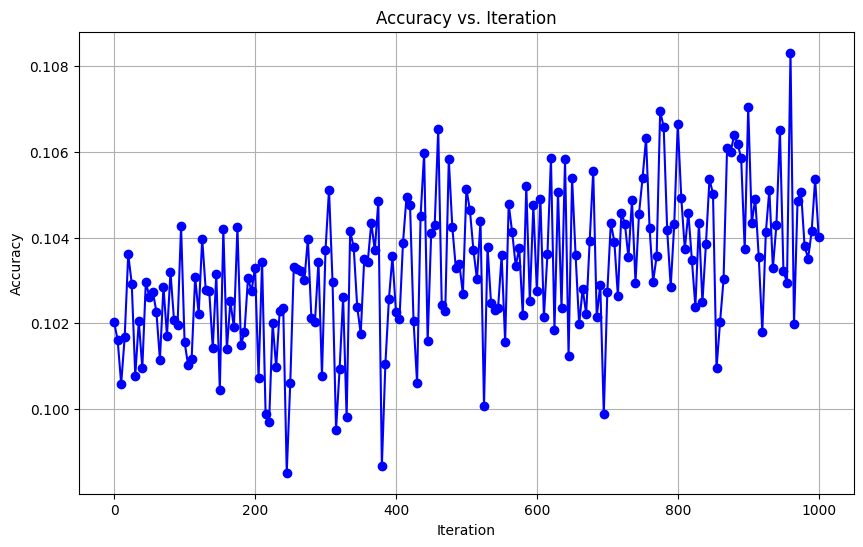

In [46]:
iterations, accuracies = zip(*accuracy_list)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [47]:
def test_predictions(W1, b1, W2, b2, X_test, y_test):
    test = make_prediction(X_test, W1, b1, W2, b2)
    image = X_test.T
    print(test.shape)
    accuracy = accuracy_sc(test, y_test)
    print(f"Accuracy:{accuracy}")
    y_test_label = obtain_predictions(y_test)
    for i in range(10):
        print(test[i], y_test_label[i])
        print(image[i].shape)
        plot_image(image[i])

(1000,)
Accuracy:0.124
4 3
(784,)
(28, 28)


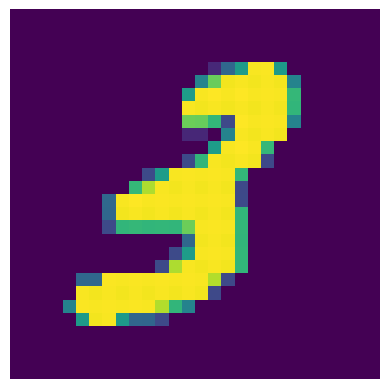

2 3
(784,)
(28, 28)


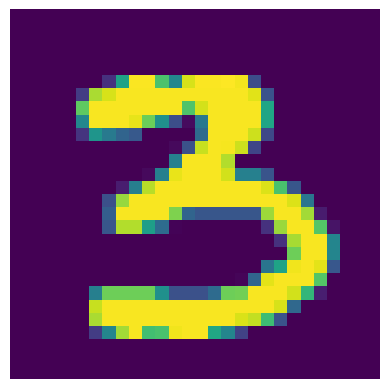

5 6
(784,)
(28, 28)


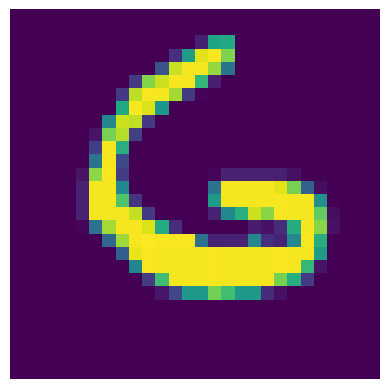

5 6
(784,)
(28, 28)


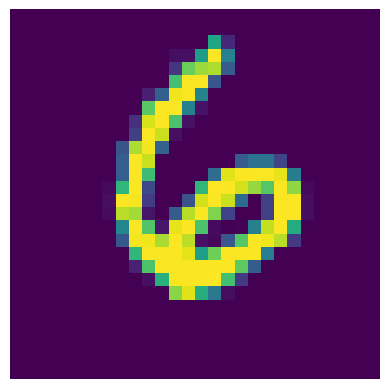

8 1
(784,)
(28, 28)


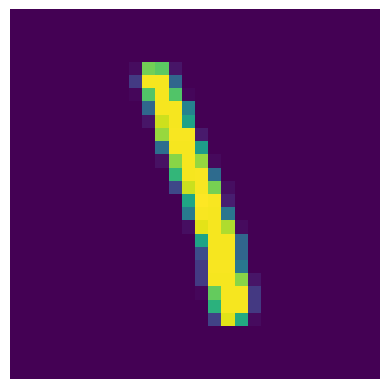

8 6
(784,)
(28, 28)


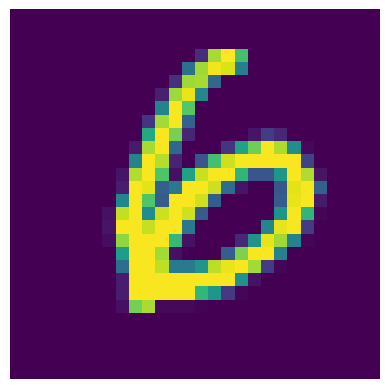

2 9
(784,)
(28, 28)


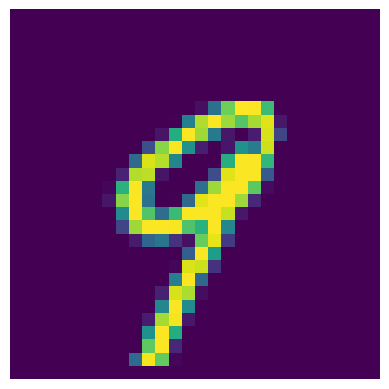

4 0
(784,)
(28, 28)


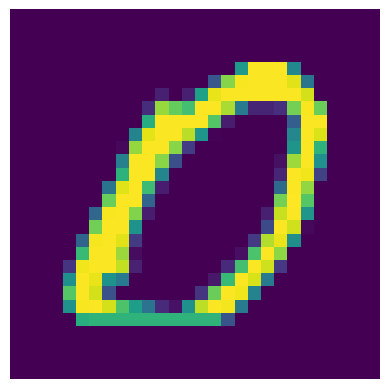

3 7
(784,)
(28, 28)


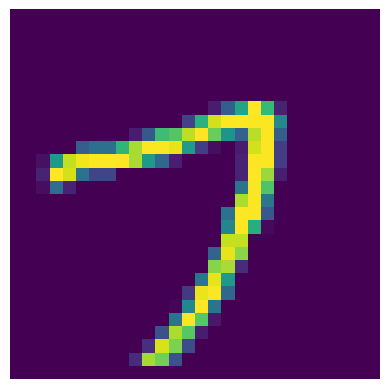

3 0
(784,)
(28, 28)


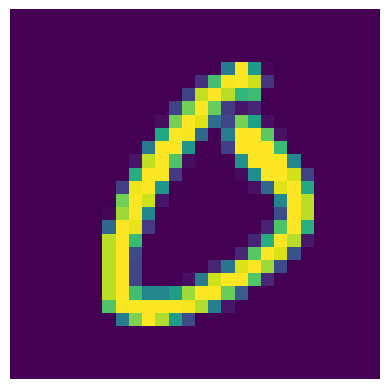

In [48]:
test_predictions(W1, b1, W2, b2, X_test, y_test)